In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

## Latitudes

In [2]:
width=0.05
offset=0.05

Baker_Lat=48.7767
Adams_Lat=46.2024
Glacier_Lat=48.1119
Rainier_Lat=46.8523
MedicineLake_offset=0.1
MSH_Lat=46.1914
Adams_Lat=46.2024
Hood_Lat=45.3736
Jefferson_Lat=44.6743
NorthSister_Lat=44.1662+offset
SouthSister_Lat=44.1034
Sisters_Lat=44.13
CraterLake_Lat=42.85
Shasta_Lat=41.544
Lassen_Lat=40.654342
MedicineLake_Lat=41.6108
GVB_Lat=49.9366
Newberry_Lat=43.7221

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

C:\Users\penny\AppData\Local\Temp\ipykernel_17028\1235128139.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


## Loading in Cpx data

In [4]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)

In [5]:
All_Cpx['Volcano'].unique()

array(['GVB', 'Baker', 'Glacier', 'Rainier', 'Adams', 'MSH', 'Hood',
       'MedicineLake', 'Jefferson', 'North Sister', 'South Sister',
       'CraterLake', 'Shasta', 'Lassen'], dtype=object)

## Loading in Amp data

In [6]:
with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)


In [7]:
All_Amp['Volcano'].unique()

array(['Baker', 'Rainier', 'MSH', 'Adams', 'Hood', 'CraterLake',
       'Jefferson', 'MedicineLake', 'Lassen'], dtype=object)

## Looping over different volcanoes

In [8]:
rho=2700
P_axis_min=-1.5
P_axis_max=10
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


In [9]:
All_Cpx.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,K2O_Cpx,SampleID,Total,NiO,Stage,test_total,Unnamed: 16,Phase,Preferred_P,Preferred_P2
0,0.194155,1400.801135,1358.921144,1.759463,1361.974444,1429.792222,1.508398,1400.863516,1394.704876,2.061416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,0.194155,1.759463
1,-1.426324,1404.939042,1290.846517,1.688204,1293.932222,1414.670000,1.369424,1389.102258,1387.899508,1.793087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,-1.426324,1.688204
2,0.331366,1393.253094,1348.876368,1.657224,1349.668889,1416.891111,1.927853,1402.150657,1393.330379,2.144638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,0.331366,1.657224
3,0.264655,1425.944868,1319.612687,1.571333,1308.003333,1421.067778,1.346060,1419.184754,1423.491658,1.595929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,0.264655,1.571333
4,-0.275789,1419.220640,1293.219652,1.844423,1290.923333,1423.687778,1.510140,1403.527163,1399.823308,1.927824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,-0.275789,1.844423


In [10]:
All_Amp['Volcano'].unique()

array(['Baker', 'Rainier', 'MSH', 'Adams', 'Hood', 'CraterLake',
       'Jefferson', 'MedicineLake', 'Lassen'], dtype=object)

new volc
Adams
new volc
MedicineLake
new volc
North Sister


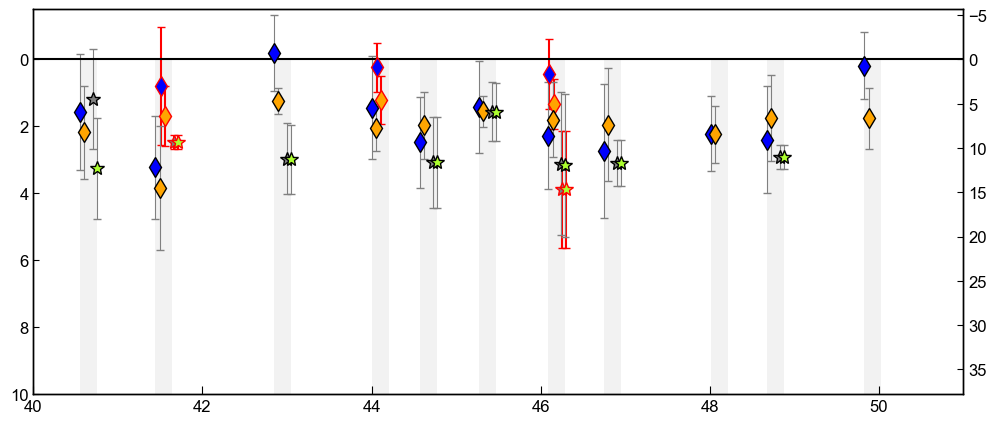

In [13]:

fig, (ax1) = plt.subplots(1, figsize=(12,5))

import matplotlib.patches as patches
# Add the patch to the Axes

ax2 = ax1.twinx()
## Ax1
ms_d=10
offset=0.05
for volc in All_Cpx['Volcano'].unique():
    volc_index=All_Cpx['Volcano']==volc
    volc_index_Amp=All_Amp['Volcano']==volc


    # Color these red
    if volc!="MedicineLake" and volc!="Adams" and volc!="Newberry" and volc!="North Sister":
        # Cpx
        rect=patches.Rectangle((np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-2*offset,
                    0),4*offset,P_axis_max,linewidth=1,
                               edgecolor='none',facecolor='grey', alpha=0.1, 
                                 label='test')
        ax1.add_patch(rect)
        ax1.errorbar(np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-2*offset,
                     np.nanmedian(All_Cpx['P_Wang21_eq1'].loc[volc_index]),
                     xerr=0,
                     yerr=np.nanstd(All_Cpx['P_Wang21_eq1'].loc[volc_index]),
                     fmt='d', ecolor='grey', elinewidth=0.8, mfc='blue',
                     ms=ms_d, mec='k',  capsize=3)
        ax1.errorbar(np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-offset,
                     np.nanmedian(All_Cpx['P_Jorgenson22'].loc[volc_index]),
                     xerr=0,
                     yerr=np.nanstd(All_Cpx['P_Jorgenson22'].loc[volc_index]),
                     fmt='d', ecolor='grey', elinewidth=0.8, mfc='orange',
                     ms=ms_d, mec='k',  capsize=3)
        # Amphibole
        ax1.errorbar(np.nanmedian(All_Amp['Latitude'].loc[volc_index_Amp])+offset,
                     np.nanmedian(All_Amp['P_Ridolfi21'].loc[volc_index_Amp]),
                     xerr=0,
                     yerr=np.nanstd(All_Amp['P_Ridolfi21'].loc[volc_index_Amp]),
                     fmt='*', ecolor='grey', elinewidth=0.8, mfc='grey',
                     ms=ms_d, mec='k',  capsize=3) 
        
        ax1.errorbar(np.nanmedian(All_Amp_Filt['Latitude'].loc[volc_index_Amp])+2*offset,
                     np.nanmedian(All_Amp_Filt['P_Ridolfi21'].loc[volc_index_Amp]),
                     xerr=0,
                     yerr=np.nanstd(All_Amp_Filt['P_Ridolfi21'].loc[volc_index_Amp]),
                     fmt='*', ecolor='grey', elinewidth=0.8, mfc='greenyellow',
                     ms=ms_d, mec='k',  capsize=3)       
    #elif volc!='Adams':
    else:
        print('new volc')
        print(volc)
        # rect=patches.Rectangle((np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-2*offset,
        #             0),4*offset,P_axis_max,linewidth=1,
        #                        edgecolor='red',facecolor='none', alpha=1, 
        #                          label='test')
        #ax1.add_patch(rect)
        # if volc!='North Sister':
        #     rect=patches.Rectangle((np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-2*offset,
        #                 0),4*offset,P_axis_max,linewidth=1,
        #                            edgecolor='red',facecolor='red', alpha=0.1, 
        #                              label='test')
        #     ax1.add_patch(rect)
        ax1.errorbar(np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-2*offset,
                     np.nanmedian(All_Cpx['P_Wang21_eq1'].loc[volc_index]),
                     xerr=0,
                     yerr=np.nanstd(All_Cpx['P_Wang21_eq1'].loc[volc_index]),
                     fmt='d', ecolor='red', elinewidth=1.5, mfc='blue',
                     ms=ms_d, mec='r',  capsize=3)
        ax1.errorbar(np.nanmedian(All_Cpx['Latitude'].loc[volc_index])-offset,
                     np.nanmedian(All_Cpx['P_Jorgenson22'].loc[volc_index]),
                     xerr=0,
                     yerr=np.nanstd(All_Cpx['P_Jorgenson22'].loc[volc_index]),
                     fmt='d', ecolor='red', elinewidth=1.5, mfc='orange',
                     ms=ms_d, mec='r',  capsize=3)    
        # Amphibole
        ax1.errorbar(np.nanmedian(All_Amp['Latitude'].loc[volc_index_Amp])+offset,
                     np.nanmedian(All_Amp['P_Ridolfi21'].loc[volc_index_Amp]),
                     xerr=0,
                     yerr=np.nanstd(All_Amp['P_Ridolfi21'].loc[volc_index_Amp]),
                     fmt='*', ecolor='red', elinewidth=1.5, mfc='grey',
                     ms=ms_d, mec='r',  capsize=3) 
        
        ax1.errorbar(np.nanmedian(All_Amp_Filt['Latitude'].loc[volc_index_Amp])+2*offset,
                     np.nanmedian(All_Amp_Filt['P_Ridolfi21'].loc[volc_index_Amp]),
                     xerr=0,
                     yerr=np.nanstd(All_Amp_Filt['P_Ridolfi21'].loc[volc_index_Amp]),
                     fmt='*', ecolor='red', elinewidth=1.5, mfc='greenyellow',
                     ms=ms_d, mec='r',  capsize=3)         
        
# for volc in All_Amp['Volcano'].unique():
#     volc_index=All_Amp['Volcano']==volc
ax1.plot([40, 51], [0, 0], '-k')
ax1.set_xlim([40, 51])
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
fig.savefig('Cpx_Amp_Lat.png', dpi=200)

## Hood